In [1]:
## setting
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.style as style

###  Call Data


In [2]:
## Carrier infor (Ag only)
carrier_ag = pd.read_csv('G:\AccidentData\AGRICULTURAL CARRIERS.txt', sep=",")

In [3]:
# indicating carrier type (will drop regrefreigiated food carrier)
carrier_ag['ag']=1

In [4]:
# All carrier census road
car_cencus= pd.read_csv('G:\AccidentData\FMCSA_CENSUS1_2018Dec\FMCSA_CENSUS1_2018Dec.txt', sep=",",encoding= "ISO-8859-1")

In [5]:
car_cencus.columns

Index(['DOT_NUMBER', 'LEGAL_NAME', 'DBA_NAME', 'CARRIER_OPERATION', 'HM_FLAG',
       'PC_FLAG', 'PHY_STREET', 'PHY_CITY', 'PHY_STATE', 'PHY_ZIP',
       'PHY_COUNTRY', 'MAILING_STREET', 'MAILING_CITY', 'MAILING_STATE',
       'MAILING_ZIP', 'MAILING_COUNTRY', 'TELEPHONE', 'FAX', 'EMAIL_ADDRESS',
       'MCS150_DATE', 'MCS150_MILEAGE', 'MCS150_MILEAGE_YEAR', 'ADD_DATE',
       'OIC_STATE', 'NBR_POWER_UNIT', 'DRIVER_TOTAL'],
      dtype='object')

In [6]:
# There are mismatches in column names, so select common variable
car_cencus= car_cencus[['DOT_NUMBER', 'LEGAL_NAME', 'DBA_NAME', 'CARRIER_OPERATION',
        'HM_FLAG', 'PHY_STREET',
       'PHY_CITY', 'PHY_STATE', 'PHY_ZIP', 'PHY_COUNTRY', 'NBR_POWER_UNIT',
       'DRIVER_TOTAL']]

In [7]:
car_cencus.columns= ['DOT_NUMBER', 'LEGAL_NAME', 'DBA_NAME', 'CARRIER_OPERATION',
        'HM_FLAG', 'PHY_STREET',
       'PHY_CITY', 'PHY_STATE', 'PHY_ZIP', 'PHY_COUNTRY', 'NBR_POWER_UNIT',
       'TOTAL_DRIVERS']

## Append ag carrier list and whole list, drop duplication 

In [8]:
carrier=pd.concat([carrier_ag,car_cencus],sort=False).drop_duplicates('DOT_NUMBER',keep='first').reset_index(drop=True)

In [9]:
carrier['ag']=carrier['ag'].replace(np.nan,0)
carrier['ag'].value_counts()

0.0    1197218
1.0     751612
Name: ag, dtype: int64

In [10]:
##Carrier filter


## make firm size variable
carrier.dropna(subset=['NBR_POWER_UNIT'], inplace=True)
carrier['firm_size']=0
carrier['firm_size']=np.where(carrier['NBR_POWER_UNIT']==2, 2,carrier['firm_size'])
carrier['firm_size']=np.where(carrier['NBR_POWER_UNIT']==3, 2,carrier['firm_size'])
carrier['firm_size']=np.where(carrier['NBR_POWER_UNIT']==4, 2,carrier['firm_size'])
carrier['firm_size']=np.where(carrier['NBR_POWER_UNIT']<=1, 1,carrier['firm_size'])
carrier['firm_size']=np.where(carrier['NBR_POWER_UNIT']>4, 3,carrier['firm_size'])

In [11]:
#2 call crash_summary
# carrier_crash = pd.read_csv('CRASH SUMMARY.txt', sep=",")

In [12]:
#3 call crash data
#crash_ag= pd.read_csv('CRASH DETAIL.txt',sep=",", encoding= "ISO-8859-1") Old data

crash_all= pd.read_csv('G:\AccidentData\crash_all.txt',sep=",", encoding= "ISO-8859-1")

In [13]:
#carrier.columns
#crash_all.columns
#carrier_crash.columns

#4 merge carrier and crash_summer as acc
# acc= pd.merge(carrier,carrier_crash, how='left', on ='DOT_NUMBER')

In [14]:
#5 merge carrier with crash details
df1= pd.merge(crash_all, carrier, how='left', on ='DOT_NUMBER',indicator=True)

df1.columns

Index(['CRASH_ID', 'REPORT_STATE', 'REPORT_NUMBER', 'REPORT_DATE',
       'REPORT_TIME', 'DOT_NUMBER', 'LOCATION', 'CITY', 'STATE', 'COUNTY_CODE',
       'TRUCK_BUS_IND', 'AXLES', 'CARGO_BODY_TYPE_DESC', 'GVWR',
       'GVW_RATING_DESC', 'VEHICLE_IDENTIFICATION_NUMBER',
       'VEHICLE_LICENSE_NUMBER', 'VEHICLE_LIC_STATE', 'VEHICLE_HAZMAT_PLACARD',
       'VEHICLE_HAZMAT_MATERIAL', 'VEHICLE_CONFIGURATION_DESC',
       'HAZMAT_RELEASED', 'VEHICLES_IN_ACCIDENT', 'FATALITIES', 'INJURIES',
       'TOW_AWAY', 'TRAFFICWAY_DESC', 'ROAD_SURFACE_CONDITION_DESC',
       'WEATHER_CONDITION_DESC', 'LEGAL_NAME', 'DBA_NAME', 'CARRIER_OPERATION',
       'CARGO_CLASSIFICATION_CODE', 'HM_FLAG', 'PASSENGER_FLAG', 'PHY_STREET',
       'PHY_CITY', 'PHY_STATE', 'PHY_ZIP', 'PHY_COUNTRY', 'NBR_POWER_UNIT',
       'TOTAL_DRIVERS', 'ag', 'firm_size', '_merge'],
      dtype='object')

In [15]:
#df1['ag']=np.where(df1['_merge']=='left_only',0,df1['ag'])


In [16]:
#6 merge with county infor
#6.1 load country code dictionary
county_code= pd.read_excel('G:\AccidentData\countycode.xlsx')

####### state+ county code= country-> mapping 


#6.2 merge with data. ####### state+ county code= country-> mapping 
data= pd.merge(df1,county_code, how='left', left_on= ['STATE', 'COUNTY_CODE'], right_on =['state', 'countyfp'])

In [17]:
# number of crash data with out dot number
data['DOT_NUMBER'].isna().sum()

292030

In [18]:
# data.COUNTY_CODE.value_counts()
data.STATE.value_counts()

TX    169370
CA    113844
IL     68383
NC     66195
OH     63366
PA     62698
FL     60642
NJ     58189
GA     54818
IN     50747
NY     49569
MI     46092
MO     44497
VA     40367
LA     38661
TN     38521
AL     35444
KY     31645
OK     30986
SC     28890
WI     25619
AR     25309
MD     23906
MN     23405
IA     20491
CO     18841
MA     18192
WA     18051
KS     17798
MS     15931
UT     15651
OR     15312
NE     12385
CT     11034
AZ     10871
WY     10406
WV     10242
NM      8765
ME      7632
ID      7617
ND      6783
MT      6072
NV      5466
DE      4606
NH      4135
SD      3732
VT      2287
RI      1992
DC      1771
HI       972
AK       851
PR       179
GU        51
AS        29
MP         1
Name: STATE, dtype: int64

In [54]:
### 
data.drop_duplicates(subset=['CRASH_ID'],keep=False, inplace=True)

#import geopandas as gp
#file= "G:\AccidentData\cb_2017_us_county_500k\cb_2017_us_county_500k.shp"
#map_county=gp.read_file(file)
#
#2
#map_county.dtype
##
#
#from shapely.geometry import Point
#from geopandas.tools import geocode


data.REPORT_DATE = pd.to_datetime(data.REPORT_DATE)

data['year'] = data['REPORT_DATE'].dt.year
data['month'] = data['REPORT_DATE'].dt.month

In [20]:
#Drop missing data
data.dropna(subset=['statefp'], inplace=True)
data.dropna(subset=['NBR_POWER_UNIT'], inplace=True)


In [21]:
## drop un realistic data if # of  powerunit and driver too much
data=data[data.NBR_POWER_UNIT<=10*(data.TOTAL_DRIVERS+1)]
data=data[data.TOTAL_DRIVERS<=10*(data.NBR_POWER_UNIT+1)]

In [22]:
data['statefp']=data['statefp'].astype(int)
data['countyfp']=data['countyfp'].astype(int)

data['statefp'].value_counts()

data['statefp']=data['statefp'].map('{:0>2}'.format)
data['countyfp'].value_counts()
data['countyfp']=data['countyfp'].map('{:0>3}'.format)

data['geoid'] = data['statefp'].astype(str) + data['countyfp'].astype(str)
data['geoid2'] = pd.Categorical(data['geoid'])

In [23]:
## cut to the 5 digit zipcode

carrier['zipcode']=carrier['PHY_ZIP'].str[:5]

carry_zip=carrier['zipcode'].value_counts()
#carry_zip.to_csv('carrier_zip.csv')

carrier.groupby(['zipcode'])['NBR_POWER_UNIT'].sum()


county=data['geoid2'].value_counts()


state_acc=pd.crosstab(data['STATE'],data['year'])
## 
#county.to_csv(r'county.csv')

In [24]:
data['year'].value_counts()

2017    130854
2016    122689
2018    116615
2015    115346
2014    106768
2013     92436
2012     82430
2011     79813
2008     77516
2010     75090
2009     67421
Name: year, dtype: int64

In [25]:
data['REPORT_STATE'].value_counts()

data['CARGO_BODY_TYPE_DESC'].value_counts()

VAN/ENCLOSED BOX                                498319
FLATBED                                         132227
OTHER                                           128988
DUMP                                             78758
CARGO TANK                                       74745
NOT APPLICABLE/NO CARGO BODY                     44549
GRAIN, CHIPS, GRAVEL                             24566
GARBAGE/REFUSE                                   23843
AUTO TRANSPORTER                                 12606
LOGGING                                          11447
INTERMODAL                                       10121
CONCRETE MIXER                                    9233
POLE                                              4788
VEHICLE TOWING ANOTHER VEHICLE                    4703
BUS (SEATS FOR > 15 PEOPLE, INCLUDING DRIVER        29
BUS (SEATS FOR 9-15 PEOPLE, INCLUDING DRIVER         3
Name: CARGO_BODY_TYPE_DESC, dtype: int64

In [26]:
data['CARGO_CLASSIFICATION_CODE'].value_counts()

F                       95158
J; R; W                 68498
W                       40516
J; W                    34258
P                       32865
F; J; P; R; W           17658
AA                      17207
AA; P                   16941
J                       16937
F; J; R; W              12347
F; P                    11302
AA; F; P                10872
R; W                     7780
O; P                     5895
AA; F; J; P              5851
AA; F                    5679
AA; F; O; P; R; W        5552
O                        4398
AA; O; P                 4219
J; P; R; W               3599
F; J; W                  3434
AA; F; J; P; R; W        3423
J; R                     3189
AA; F; P; W              3189
F; W                     2605
AA; F; J; O; P; R; W     2235
J; P                     2115
J; P; W                  1959
AA; F; O; P              1677
AA; J; P; R; W           1561
                        ...  
F; J; R                    35
AA; P; R                   35
AA; J; O; 

In [27]:
data['DOT_NUMBER'].isna().sum()

0

In [28]:
## AA:"Agircultural Equipment"
## P: "Grain"
## O: "Livestock"
## J: "Fresh_product"
## R: "Meat"
## W: "Food"
## F: "LOG

carrier['CARGO_CLASSIFICATION_CODE'].str.split('; \s*')
carrier['CARGO_CLASSIFICATION_CODE'].unique()

carrier['ag']=np.where(carrier['CARGO_CLASSIFICATION_CODE'].str.contains("W"),0,carrier['ag'])

carrier['sol_cargos']="Muti_Purpose"
carrier['sol_cargos']=np.where(carrier['CARGO_CLASSIFICATION_CODE'].str.contains("W"), "non Ag",carrier['sol_cargos'])
carrier['sol_cargos']=np.where(carrier['ag']==0, "non Ag",carrier['sol_cargos'])
carrier['sol_cargos']=np.where(carrier['CARGO_CLASSIFICATION_CODE']=="AA", "Agricultural Equipment",carrier['sol_cargos'])
carrier['sol_cargos']=np.where(carrier['CARGO_CLASSIFICATION_CODE']=="P", "Grain",carrier['sol_cargos'])
carrier['sol_cargos']=np.where(carrier['CARGO_CLASSIFICATION_CODE']=="O", "Livestock",carrier['sol_cargos'])
carrier['sol_cargos']=np.where(carrier['CARGO_CLASSIFICATION_CODE']=="J", "Fresh_product",carrier['sol_cargos'])
carrier['sol_cargos']=np.where(carrier['CARGO_CLASSIFICATION_CODE']=="R", "Meat",carrier['sol_cargos'])
carrier['sol_cargos']=np.where(carrier['CARGO_CLASSIFICATION_CODE']=="W","non Ag",carrier['sol_cargos'])
carrier['sol_cargos']=np.where(carrier['CARGO_CLASSIFICATION_CODE']=="F","Log",carrier['sol_cargos'])
carrier['sol_cargos'].value_counts()

non Ag                    1256231
Muti_Purpose               190822
Log                        176754
Grain                       96461
Fresh_product               49989
Agricultural Equipment      34270
Livestock                   22448
Meat                         3303
Name: sol_cargos, dtype: int64

In [30]:
carrier_stat=carrier.groupby(by='sol_cargos').agg({'NBR_POWER_UNIT':sum,
                            'TOTAL_DRIVERS': sum,
                            'DOT_NUMBER':"count"})

In [32]:
#carrier_stat.reset_index(inplace=True)
#carrier_stat=carrier_stat[:-1]
#
#carrier['sol_cargos'].value_counts()
carrier_stat

,NBR_POWER_UNIT,TOTAL_DRIVERS,DOT_NUMBER
sol_cargos,,,
Agricultural Equipment,2022127.0,248306.0,34270
Fresh_product,262415.0,205713.0,49989
Grain,1479549.0,457097.0,96461
Livestock,68195.0,47435.0,22448
Log,2051849.0,1214351.0,176754
Meat,114896.0,15080.0,3303
Muti_Purpose,2195677.0,1207409.0,190822
non Ag,25069589.0,8051627.0,1256231


In [37]:
total_u=0.0001*carrier_stat['NBR_POWER_UNIT']*carrier_stat['DOT_NUMBER']
totals_all=pd.concat([total_u]*11,axis=1)
# 11 means number of years

In [39]:
### AG_ NON AG
carrier_gstat=carrier.groupby(by='ag').agg({'NBR_POWER_UNIT':sum,
                            'TOTAL_DRIVERS': sum,
                            'DOT_NUMBER':"count"})
carrier_gstat

,NBR_POWER_UNIT,TOTAL_DRIVERS,DOT_NUMBER
ag,,,
0.0,25069589.0,8051627.0,1256231
1.0,8194708.0,3395391.0,574047


In [41]:
#carrier_gstat.reset_index(inplace=True)
total_g=0.00001*carrier_gstat['NBR_POWER_UNIT']*carrier_gstat['DOT_NUMBER']
totals_general=pd.concat([total_g]*11,axis=1)


,0,1,2,3,4,5,6,7,8,9,10
ag,,,,,,,,,,,
0.0,3.149319e+08,3.149319e+08,3.149319e+08,3.149319e+08,3.149319e+08,3.149319e+08,3.149319e+08,3.149319e+08,3.149319e+08,3.149319e+08,3.149319e+08
1.0,4.704148e+07,4.704148e+07,4.704148e+07,4.704148e+07,4.704148e+07,4.704148e+07,4.704148e+07,4.704148e+07,4.704148e+07,4.704148e+07,4.704148e+07


In [103]:
## By size total number of car
firm_stat=carrier.groupby(by=['firm_size','sol_cargos']).agg({'NBR_POWER_UNIT':sum,
                            'TOTAL_DRIVERS': sum,
                            'DOT_NUMBER':"count"})
firm_stat

NBR_POWER_UNIT  TOTAL_DRIVERS  DOT_NUMBER
firm_size sol_cargos                                                       
1         Agricultural Equipment         19785.0        46266.0       20007
          Fresh_product                  32320.0        65211.0       32394
          Grain                          56736.0       123089.0       56858
          Livestock                      16872.0        23067.0       16938
          Log                           101760.0       242538.0      102370
          Meat                            1734.0         2412.0        1744
          Muti_Purpose                  106182.0       208976.0      106838
          non Ag                        746555.0      1983519.0      754571
2         Agricultural Equipment         26513.0       111763.0       10474
          Fresh_product                  30316.0        33334.0       11884
          Grain                          77777.0       221017.0       30478
          Livestock                      10913.0        13047.0        4478
          Log                           132640.0       239375.0       51664
          Meat                            2559.0         2504.0         965
          Muti_Purpose                  163236.0       258202.0       64137
          non Ag                        857029.0      1247912.0      333097
3         Agricultural Equipment       1975829.0        90277.0        3789
          Fresh_product                 199779.0       107168.0        5711
          Grain                        1345036.0       112991.0        9125
          Livestock                      40410.0        11321.0        1032
          Log                          1817449.0       732438.0       22720
          Meat                          110603.0        10164.0         594
          Muti_Purpose                 1926259.0       740231.0       19847
          non Ag                      23466005.0      4820196.0      168563

In [104]:
total_car=0.0001*firm_stat['NBR_POWER_UNIT']*firm_stat['DOT_NUMBER']

In [106]:
#total_car=total_car[:-1]


total_car

firm_size  sol_cargos            
1          Agricultural Equipment    3.958385e+04
           Fresh_product             1.046974e+05
           Grain                     3.225895e+05
           Livestock                 2.857779e+04
           Log                       1.041717e+06
           Meat                      3.024096e+02
           Muti_Purpose              1.134427e+06
           non Ag                    5.633288e+07
2          Agricultural Equipment    2.776972e+04
           Fresh_product             3.602753e+04
           Grain                     2.370487e+05
           Livestock                 4.886841e+03
           Log                       6.852713e+05
           Meat                      2.469435e+02
           Muti_Purpose              1.046947e+06
           non Ag                    2.854738e+07
3          Agricultural Equipment    7.486416e+05
           Fresh_product             1.140938e+05
           Grain                     1.227345e+06
           Lives

Text(0.5,0,'Year')

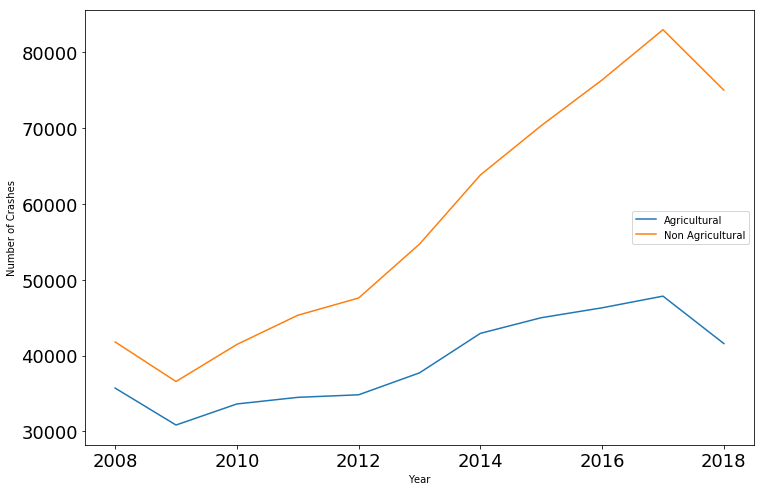

In [55]:
#### Figure 1

data['ag']=np.where(data['CARGO_CLASSIFICATION_CODE']=="W",0,data['ag'])
data['ag1']='Non Agricultural'
data['ag1']= np.where(data['ag']==1,'Agricultural',data['ag1'])
data['ag1'].value_counts()

fig0_dt=pd.crosstab(data['year'],data['ag1'])
fig0=fig0_dt.plot(figsize = (12,8))
fig0.tick_params(axis = 'both', which = 'major', labelsize = 18)
fig0.legend(loc='center right')
fig0.set_ylabel('Number of Crashes')
fig0.set_xlabel('Year')

Text(0.5,0,'Year')

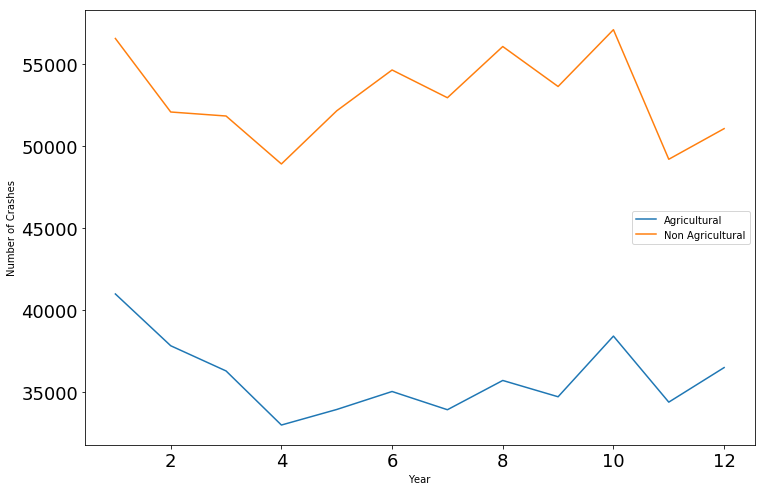

In [56]:
#### Figure 1-1

data['ag']=np.where(data['CARGO_CLASSIFICATION_CODE']=="W",0,data['ag'])
data['ag1']='Non Agricultural'
data['ag1']= np.where(data['ag']==1,'Agricultural',data['ag1'])
data['ag1'].value_counts()

fig0_dt=pd.crosstab(data['month'],data['ag1'])
fig0=fig0_dt.plot(figsize = (12,8))
fig0.tick_params(axis = 'both', which = 'major', labelsize = 18)
fig0.legend(loc='center right')
fig0.set_ylabel('Number of Crashes')
fig0.set_xlabel('Year')

Text(0.5,0,'Nubmers of Registed Carriers')

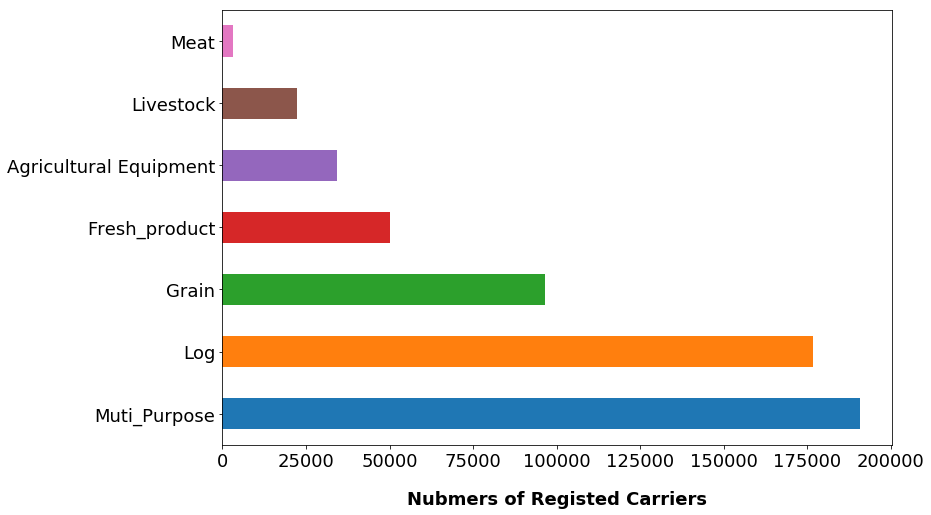

In [63]:
# Colorblind-friendly colors\
fig1_dt=carrier['sol_cargos'].value_counts()
fig1=fig1_dt[1:].plot(kind='barh',figsize = (12,8))
fig1.tick_params(axis = 'both', which = 'major', labelsize = 18)
#fig1.set_prop_cycle(cycler('color', ['c', 'm', 'y', 'k','r', 'g', 'b', 'y']) +
#                   cycler('lw', [1, 2, 3, 4]))

  # Set x-axis label
fig1.set_xlabel("Nubmers of Registed Carriers", labelpad=20, weight='bold', size=18)

In [61]:
fig1

non Ag                    1256231
Muti_Purpose               190822
Log                        176754
Grain                       96461
Fresh_product               49989
Agricultural Equipment      34270
Livestock                   22448
Meat                         3303
Name: sol_cargos, dtype: int64

In [64]:
#data['sol_cargos']="NA"
#data['sol_cargos']=np.where(data['CARGO_CLASSIFICATION_CODE']=="AA", 1,data['sol_cargos'])
#data['sol_cargos']=np.where(data['CARGO_CLASSIFICATION_CODE']=="P", 2,data['sol_cargos'])
#data['sol_cargos']=np.where(data['CARGO_CLASSIFICATION_CODE']=="O", 3,data['sol_cargos'])
#data['sol_cargos']=np.where(data['CARGO_CLASSIFICATION_CODE']=="J", 4,data['sol_cargos'])
#data['sol_cargos']=np.where(data['CARGO_CLASSIFICATION_CODE']=="R", 5,data['sol_cargos'])
#data['sol_cargos']=np.where(data['CARGO_CLASSIFICATION_CODE']=="W", 6,data['sol_cargos'])

In [65]:
data['sol_cargos']="Multi_Purpose"
data['sol_cargos']=np.where(data['CARGO_CLASSIFICATION_CODE'].str.contains("W"), "non Ag",data['sol_cargos'])
data['sol_cargos']=np.where(data['ag']==0, "non Ag",data['sol_cargos'])
data['sol_cargos']=np.where(data['CARGO_CLASSIFICATION_CODE']=="AA", "Agricultural Equipment",data['sol_cargos'])
data['sol_cargos']=np.where(data['CARGO_CLASSIFICATION_CODE']=="P", "Grain",data['sol_cargos'])
data['sol_cargos']=np.where(data['CARGO_CLASSIFICATION_CODE']=="O", "Livestock",data['sol_cargos'])
data['sol_cargos']=np.where(data['CARGO_CLASSIFICATION_CODE']=="J", "Fresh_product",data['sol_cargos'])
data['sol_cargos']=np.where(data['CARGO_CLASSIFICATION_CODE']=="R", "Meat",data['sol_cargos'])
data['sol_cargos']=np.where(data['CARGO_CLASSIFICATION_CODE']=="F","Log",data['sol_cargos'])
data['sol_cargos'].value_counts()

non Ag                    822568
Log                        95158
Multi_Purpose              76466
Grain                      32865
Agricultural Equipment     17207
Fresh_product              16937
Livestock                   4398
Meat                        1379
Name: sol_cargos, dtype: int64

In [66]:
single = data.loc[(data['sol_cargos']!="non Ag") & (data['sol_cargos']!="Multi_Purpose")]

In [67]:
fig2_data=pd.crosstab(single['year'],single['sol_cargos']).reindex()

Text(0,0.5,'Number of Crashes')

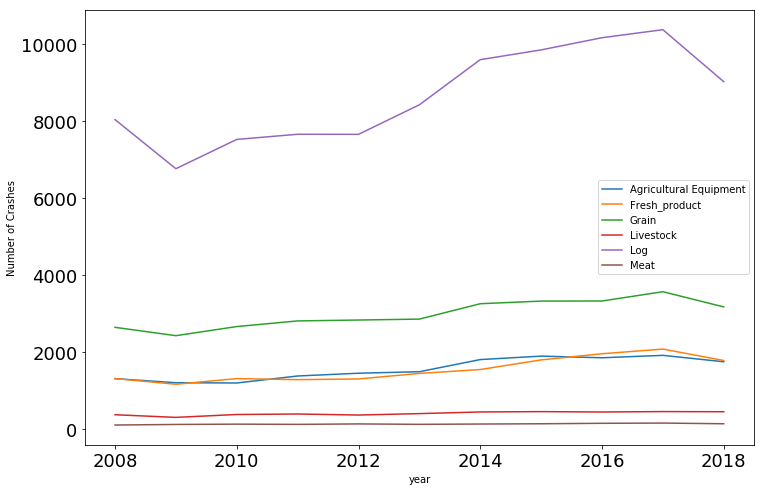

In [69]:
#fig2_data=fig2_data.iloc[1:]


fig2=fig2_data.plot(figsize = (12,8))
fig2.tick_params(axis = 'both', which = 'major', labelsize = 18)
fig2.legend(loc='center right')
fig2.set_ylabel('Number of Crashes')

In [70]:
single1=single.groupby(['year','sol_cargos'])['CRASH_ID'].count().unstack().T

Text(0,0.5,'Rates of Crashes')

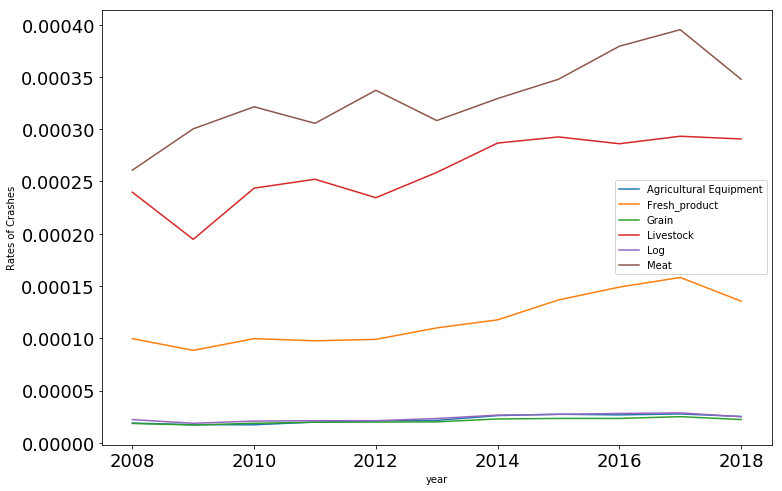

In [71]:
carrier_stat=carrier.groupby(by='sol_cargos').agg({'NBR_POWER_UNIT':sum,
                            'TOTAL_DRIVERS': sum,
                            'DOT_NUMBER':"count"})

#carrier_stat.reset_index(inplace=True)
carrier_stat1=carrier_stat[:-2]
#
#carrier['sol_cargos'].value_counts()
#carrier_stat

total_1=0.001*carrier_stat1['NBR_POWER_UNIT']*carrier_stat1['DOT_NUMBER']

totals=pd.concat([total_1]*11,axis=1)

fig3_data=single1/totals.values
fig3_data


fig3=fig3_data.T.plot(figsize = (12,8))
fig3.tick_params(axis = 'both', which = 'major', labelsize = 18)
fig3.legend(loc='center right')
fig3.set_ylabel('Rates of Crashes')

Text(0,0.5,'Rates of Crashes')

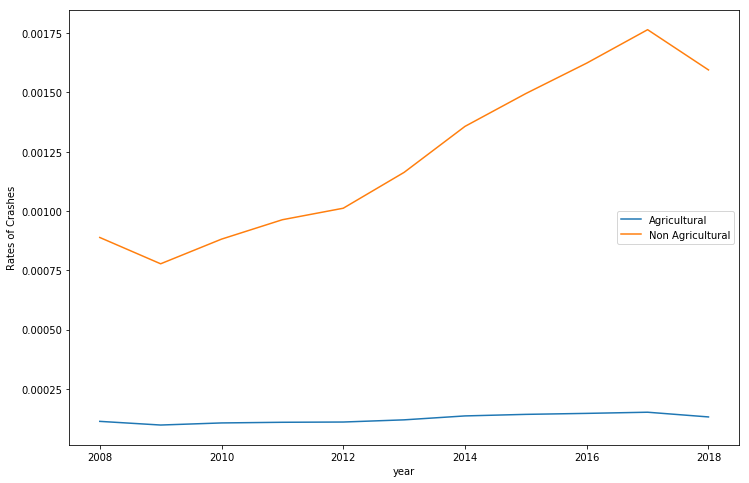

In [74]:
###FIG 4
fig4_data=data.groupby(['year','ag1'])['CRASH_ID'].count().unstack()
#fig4_data=pd.crosstab(data['year'],data['ag'])

fig4_data=fig4_data.T/totals_general.values
fig4=fig4_data.T.plot(figsize = (12,8))
fig4.legend(loc='center right')
fig4.set_ylabel('Rates of Crashes')



Text(0,0.5,'Rates of Crashes')

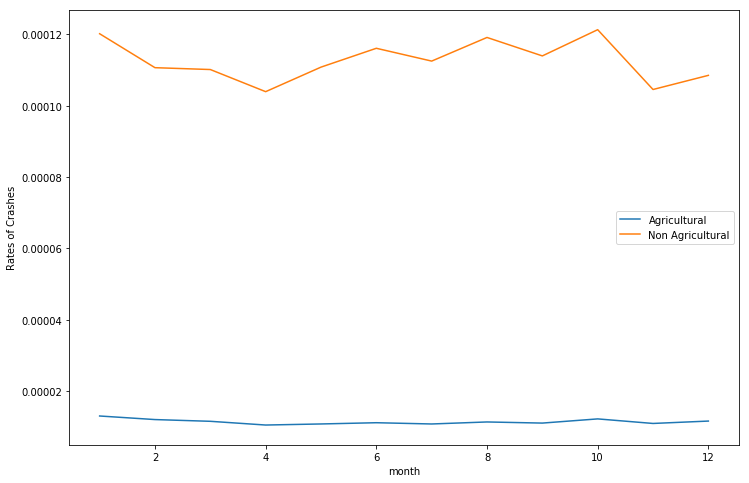

In [126]:


###FIG 4
fig4_data=data.groupby(['month','ag1'])['CRASH_ID'].count().unstack()
#fig4_data=pd.crosstab(data['year'],data['ag'])
fig4_data
carrier_gstat
total_1=0.0001*carrier_gstat['NBR_POWER_UNIT']*carrier_gstat['DOT_NUMBER']

totals=pd.concat([total_1]*12,axis=1)
totals

fig4_data=fig4_data.T/totals.values
fig4=fig4_data.T.plot(figsize = (12,8))
fig4.legend(loc='center right')
fig4.set_ylabel('Rates of Crashes')


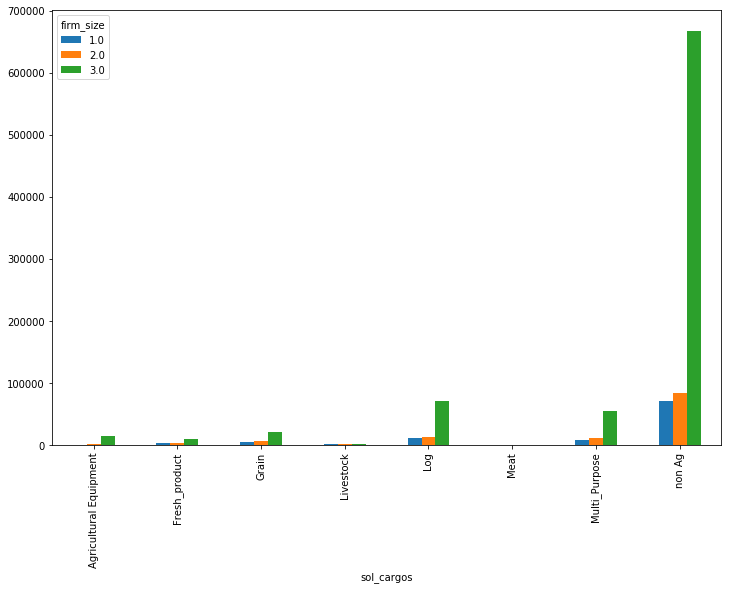

In [127]:
pd.crosstab(data['sol_cargos'],data['firm_size']).plot(kind='bar', figsize = (12,8))

In [144]:
## fig 5 firms size and accident by type
fig5_data=pd.crosstab(data['sol_cargos'],data['firm_size'])

fig5_data



firm_size,1.0,2.0,3.0
sol_cargos,,,
Agricultural Equipment,1031,1567,14609
Fresh_product,3221,3152,10564
Grain,4959,6353,21553
Livestock,1529,1305,1564
Log,11051,13481,70626
Meat,188,249,942
Multi_Purpose,8961,12073,55432
non Ag,71337,83557,667674


In [155]:
total_car

firm_size  sol_cargos            
1          Agricultural Equipment    3.958385e+04
           Fresh_product             1.046974e+05
           Grain                     3.225895e+05
           Livestock                 2.857779e+04
           Log                       1.041717e+06
           Meat                      3.024096e+02
           Muti_Purpose              1.134427e+06
           non Ag                    5.633288e+07
2          Agricultural Equipment    2.776972e+04
           Fresh_product             3.602753e+04
           Grain                     2.370487e+05
           Livestock                 4.886841e+03
           Log                       6.852713e+05
           Meat                      2.469435e+02
           Muti_Purpose              1.046947e+06
           non Ag                    2.854738e+07
3          Agricultural Equipment    7.486416e+05
           Fresh_product             1.140938e+05
           Grain                     1.227345e+06
           Lives

In [145]:
a=total_car.values.reshape((8,3))
a.shape

(8, 3)

In [154]:
a

array([[3.95838495e+04, 1.04697408e+05, 3.22589549e+05],
       [2.85777936e+04, 1.04171712e+06, 3.02409600e+02],
       [1.13442725e+06, 5.63328753e+07, 2.77697162e+04],
       [3.60275344e+04, 2.37048741e+05, 4.88684140e+03],
       [6.85271296e+05, 2.46943500e+02, 1.04694673e+06],
       [2.85473789e+07, 7.48641608e+05, 1.14093787e+05],
       [1.22734535e+06, 4.17031200e+03, 4.12924413e+06],
       [6.56981820e+03, 3.82304624e+06, 3.95550020e+08]])

In [156]:
fig_new=(fig5_data/a)



In [157]:
fig_new

firm_size,1.0,2.0,3.0
sol_cargos,,,
Agricultural Equipment,0.026046,0.014967,0.045287
Fresh_product,0.112710,0.003026,34.932753
Grain,0.004371,0.000113,0.776133
Livestock,0.042440,0.005505,0.320043
Log,0.016126,54.591435,0.067459
Meat,0.000007,0.000333,0.008256
Multi_Purpose,0.007301,2.894987,0.013424
non Ag,10.858291,0.021856,0.001688


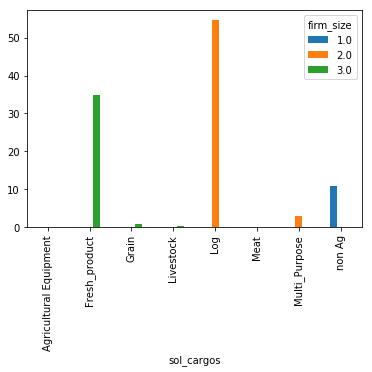

In [158]:
fig_new.plot(kind='bar')

In [159]:
### repeat this by the size of carriers


####figure 6 for allowing multi response.

data_m= data[data['sol_cargos']=='Multi_Purpose'].copy()

data['Agricultural Equipment']=np.where(data['CARGO_CLASSIFICATION_CODE'].str.contains("AA"), 1,0)
data['Grain']=np.where(data['CARGO_CLASSIFICATION_CODE'].str.contains("P"), 1,0)
data['Livestock']=np.where(data['CARGO_CLASSIFICATION_CODE'].str.contains("O"), 1,0)
data['Fresh_product']=np.where(data['CARGO_CLASSIFICATION_CODE'].str.contains("J"), 1,0)
data['Meat']=np.where(data['CARGO_CLASSIFICATION_CODE'].str.contains("R"), 1,0)
data['Log']=np.where(data['CARGO_CLASSIFICATION_CODE'].str.contains("F"), 1,0)

data['Agricultural Equipment'].value_counts()
data['Grain'].value_counts()
data['Livestock'].value_counts()
data['Fresh_product'].value_counts()
data['Meat'].value_counts()

data['Log'].value_counts()

1    787437
0    279541
Name: Log, dtype: int64

In [163]:
types=['Agricultural Equipment', 'Fresh_product', 'Grain','Livestock','Log','Meat']

In [165]:
data.groupby(['year'])[types].apply(lambda x : x.astype(int).sum())

,Agricultural Equipment,Fresh_product,Grain,Livestock,Log,Meat
year,,,,,,
2008,46188,54608,51088,41338,55305,50380
2009,40282,47686,44434,36107,47581,43964
2010,45266,53345,49821,40893,53262,49074
2011,49541,57269,54144,44868,57361,52902
2012,51764,59428,56396,46940,59561,55079
2013,59322,67963,64015,54105,67978,63035
2014,69142,78997,74524,63065,79097,73368
2015,75859,86447,81295,69590,85952,80381
2016,82013,93700,87506,75804,92602,87188


Text(0,0.5,'Rates of Crashes')

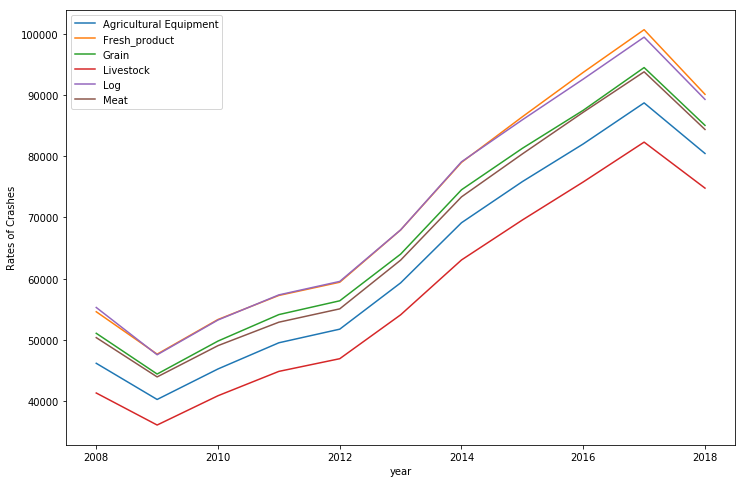

In [160]:


fig6_data=data.groupby(['year'])[types].apply(lambda x : x.astype(int).sum())
fig6=fig6_data.plot(figsize = (12,8))
fig6.set_ylabel('Rates of Crashes')


Text(0,0.5,'Rates of Crashes')

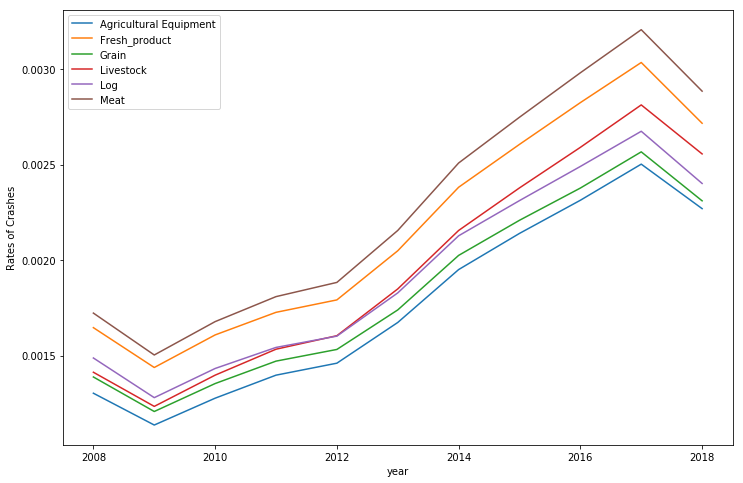

In [162]:
carrier['Agricultural Equipment']=np.where(carrier['CARGO_CLASSIFICATION_CODE'].str.contains("AA"), 1,0)
carrier['Grain']=np.where(carrier['CARGO_CLASSIFICATION_CODE'].str.contains("P"), 1,0)
carrier['Livestock']=np.where(carrier['CARGO_CLASSIFICATION_CODE'].str.contains("O"), 1,0)
carrier['Fresh_product']=np.where(carrier['CARGO_CLASSIFICATION_CODE'].str.contains("J"), 1,0)
carrier['Meat']=np.where(carrier['CARGO_CLASSIFICATION_CODE'].str.contains("R"), 1,0)
carrier['Food']=np.where(carrier['CARGO_CLASSIFICATION_CODE'].str.contains("W"), 1,0)
carrier['Log']=np.where(carrier['CARGO_CLASSIFICATION_CODE'].str.contains("F"), 1,0)

n_firm=carrier[types].apply(lambda x : x.astype(int).sum())

n_veh=[]
for x in types:
    n_veh.append(carrier.loc[carrier[x]==1,'NBR_POWER_UNIT'].sum())

total_2=n_firm*n_veh/1000000
totals_2=pd.concat([total_2]*11,axis=1)

fig7_data=fig6_data.T/totals_2.values
fig7=fig7_data.T.plot(figsize = (12,8))
fig7.set_ylabel('Rates of Crashes')

In [166]:
########
single.columns
single.CARGO_BODY_TYPE_DESC.value_counts()
pd.crosstab(single.CARGO_BODY_TYPE_DESC,single['FATALITIES'])

pd.crosstab(single.CARGO_BODY_TYPE_DESC,single['FATALITIES'])

# data.to_csv("full_data.csv")
#data['geoid'].dtype()
##data.to_csv(r'df_1214.csv')
#(ax=large_left_ax,
#    legend=True, color=['b', 'r'], title='All Tiers')